In [1]:
train_x = [0.17113311, 0.55999538, 0.00682253, 0.85503118, 0.76173999]
train_y = [0.02528355, 0.18131118, 0.00140827, 0.30242268, 0.22944056]

print(f"train_x: {train_x}")
print(f"train_y: {train_y}")

train_x: [0.17113311, 0.55999538, 0.00682253, 0.85503118, 0.76173999]
train_y: [0.02528355, 0.18131118, 0.00140827, 0.30242268, 0.22944056]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

In [3]:
slope = normal(loc=0.0, scale=1.0, size=None)
y_intercept = normal(loc=0.0, scale=1.0, size=None)

print(f"(slope: {slope}, y_intercept: {y_intercept})")

(slope: 0.1620580164746737, y_intercept: -0.9243201196681828)


In [4]:
def visualize_linear_regression(ax, title, x, y, train_x, train_y):
    ax.scatter(train_x, train_y, c="#41B06E")
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)

In [5]:
def linear_regression(x, slope, y_intercept):
    return x * slope + y_intercept

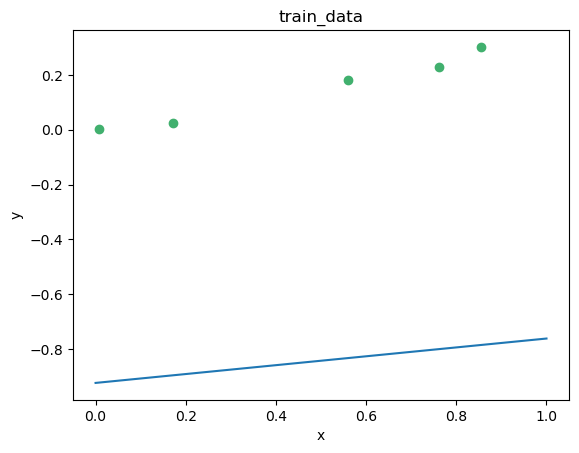

In [6]:
x = np.linspace(0., 1., 5)
y = linear_regression(x, slope, y_intercept)

fig, ax_2 = plt.subplots()
visualize_linear_regression(ax_2, 'train_data', x, y, train_x, train_y)

In [7]:
def sse(y, y_hat):
    return (y - y_hat)**2

In [8]:
def derivative_slope(f, x, slope, y_intercept, y, y_hat, dx = 0.000001):
    return (f(y, y_hat(x, slope, y_intercept)) - f(y, y_hat(x, slope + dx, y_intercept)))/(slope - (slope + dx))

In [9]:
def derivative_y_intercept(f, x, slope, y_intercept, y, y_hat, dx = 0.000001):
    return (f(y, y_hat(x, slope, y_intercept)) - f(y, y_hat(x, slope, y_intercept + dx)))/(y_intercept - ( y_intercept + dx))

In [10]:
def step_size(f, train_x, slope, train_y, learning_rate = 0.1):
    d_slope = 0.
    d_y_intercept = 0.
    for x, y in zip(train_x, train_y):
        d_slope += derivative_slope(f, x, slope, y_intercept, y, linear_regression)
        d_y_intercept += derivative_y_intercept(f, x, slope, y_intercept, y, linear_regression)
    
    return (learning_rate * d_slope, learning_rate * d_y_intercept)

In [11]:
slope_stack = []
y_intercept_stack = []

for i in range(1000):
    slope_step_size, y_intercept_step_size = step_size(sse, train_x, slope, train_y)
    
    slope_new = slope - slope_step_size
    y_intercept_new = y_intercept - y_intercept_step_size
    
    slope = slope_new
    y_intercept = y_intercept_new

    slope_stack.append(slope_new)
    y_intercept_stack.append(y_intercept_new)

    if np.dot(np.abs(slope_step_size), np.abs(y_intercept_step_size)) <= 0.000001: break

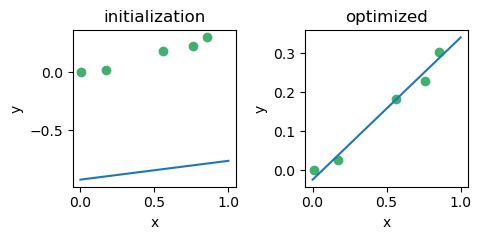

In [12]:
x = np.linspace(0., 1., 5)
y_updated = linear_regression(x, slope, y_intercept)

fig, (ax_1, ax_2)  = plt.subplots(nrows=1, ncols=2, figsize=(5, 2.5))
visualize_linear_regression(ax_1, 'initialization', x, y, train_x, train_y)
visualize_linear_regression(ax_2, 'optimized', x, y_updated, train_x, train_y)
fig.tight_layout()

In [13]:
import matplotlib.animation as animation

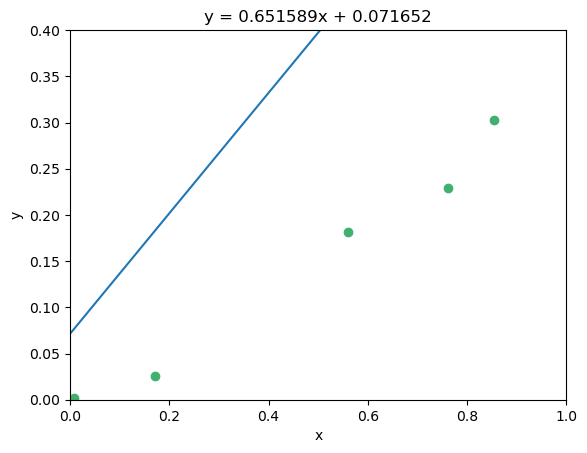

In [14]:
fig, ax = plt.subplots()

scat = ax.scatter(train_x, train_y, c="#41B06E")
line = ax.plot(x, slope_stack[0]*x + y_intercept_stack[0])[0]

ax.set(xlim=[0, 1], ylim=[0, 0.4], xlabel='x', ylabel='y')

def update(frame):
    slope_f = slope_stack[:frame]
    y_intercept_f = y_intercept_stack[:frame]

    line.set_xdata(x)
    line.set_ydata(slope_stack[frame]*x + y_intercept_stack[frame])
    ax.set_title(f"y = {slope_stack[frame]:.6f}x + {y_intercept_stack[frame]:.6f}")
    return (scat, line)

frames = len(slope_stack)
ani = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=200)

from IPython.display import HTML
HTML(ani.to_jshtml())